In [72]:
import numpy as np
from random import randint
import matplotlib
import matplotlib.pyplot as plt
import scipy.io
from PIL import Image
from IPython import display

# Principal Component Analysis

## Part 1: Setting Up PCA Functions

### Load Data

In [73]:
matrix = scipy.io.loadmat("ex7data1.mat")

In [74]:
# view headers
matrix.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [75]:
X = matrix["X"]

### Normalize Features

In [76]:
def feature_normalize(X):
    mu = X.mean(axis=0)
    sigma = np.std(X, axis=0)
    
    X_norm = X - mu    
    X_norm = X_norm / sigma   
    
    return X_norm, mu, sigma

In [77]:
X_norm, mu, sigma = feature_normalize(X) 

### Run PCA

In [78]:
def pca(X):
    m = X.shape[0]
    n = X.shape[1]
    
    sigma = 1/m * (X.T.dot(X)) # eigenvector
    U, S, V = np.linalg.svd(sigma) 
    
    return U, S

In [79]:
# U = principal components
# S = diagonal matrix
U, S = pca(X_norm)

## Part 2: Dimensionality Reduction + Reconstruction with PCA

### Reduction

In [80]:
def project_data(X, U, K):
    U_reduced = U[:, :K]
    Z = X.dot(U_reduced)
    
    return Z

In [81]:
K = 1 # project onto 1D
Z = project_data(X_norm, U, K)

In [82]:
# check work
# first example should be ~ +-1.481
Z[0]

array([1.49631261])

### Reconstruction

In [83]:
def recover_data(Z, U, K):
    X_rec = Z.dot(U[:, :K].T)
    
    
    return X_rec

In [84]:
X_rec = recover_data(Z, U, K)

In [85]:
# check work
# First example should be ~ [-1.047 -1.047]
X_rec[0]

array([-1.05805279, -1.05805279])

### Visualizing Projected Data

In [86]:
def plot_pca(X, Z):
    plt.scatter(X[:, 0], X[:, 1], label="Original")
    plt.scatter(Z, Z, label="Projected")
    
    plt.xlim(np.amin(Z)-2, np.amax(Z)+2)
    plt.ylim(np.amin(Z)-2, np.amax(Z)+2)
    
    plt.legend(loc = "upper right")
    
    plt.show()

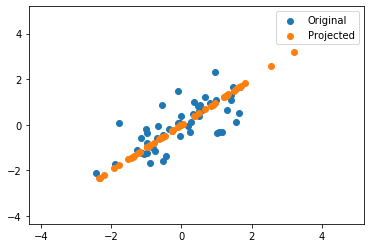

In [87]:
plot_pca(X_norm, Z)

## Part 3: Face Image Dataset

### Load Data

In [88]:
matrix = scipy.io.loadmat("ex7faces.mat")

In [89]:
# view headers
matrix.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [90]:
X = matrix["X"]

In [91]:
X.shape

(5000, 1024)

### Visualize Data

In [92]:
img_dim = np.sqrt(X.shape[1])
img_dim = int(img_dim)
m = X.shape[0]

In [93]:
# build 10x10 image grid
def display_img_grid(X, img_dim):
    m = len(X)
    
    fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(img_dim,img_dim))
    for i in range(10):
        for j in range(10):
            random_row = X[np.random.randint(0,m), :]
            array = random_row.reshape(img_dim,img_dim, order='F') # reshape to desired resolution
            ax[i, j].imshow(array, cmap='gray') # plot on grid

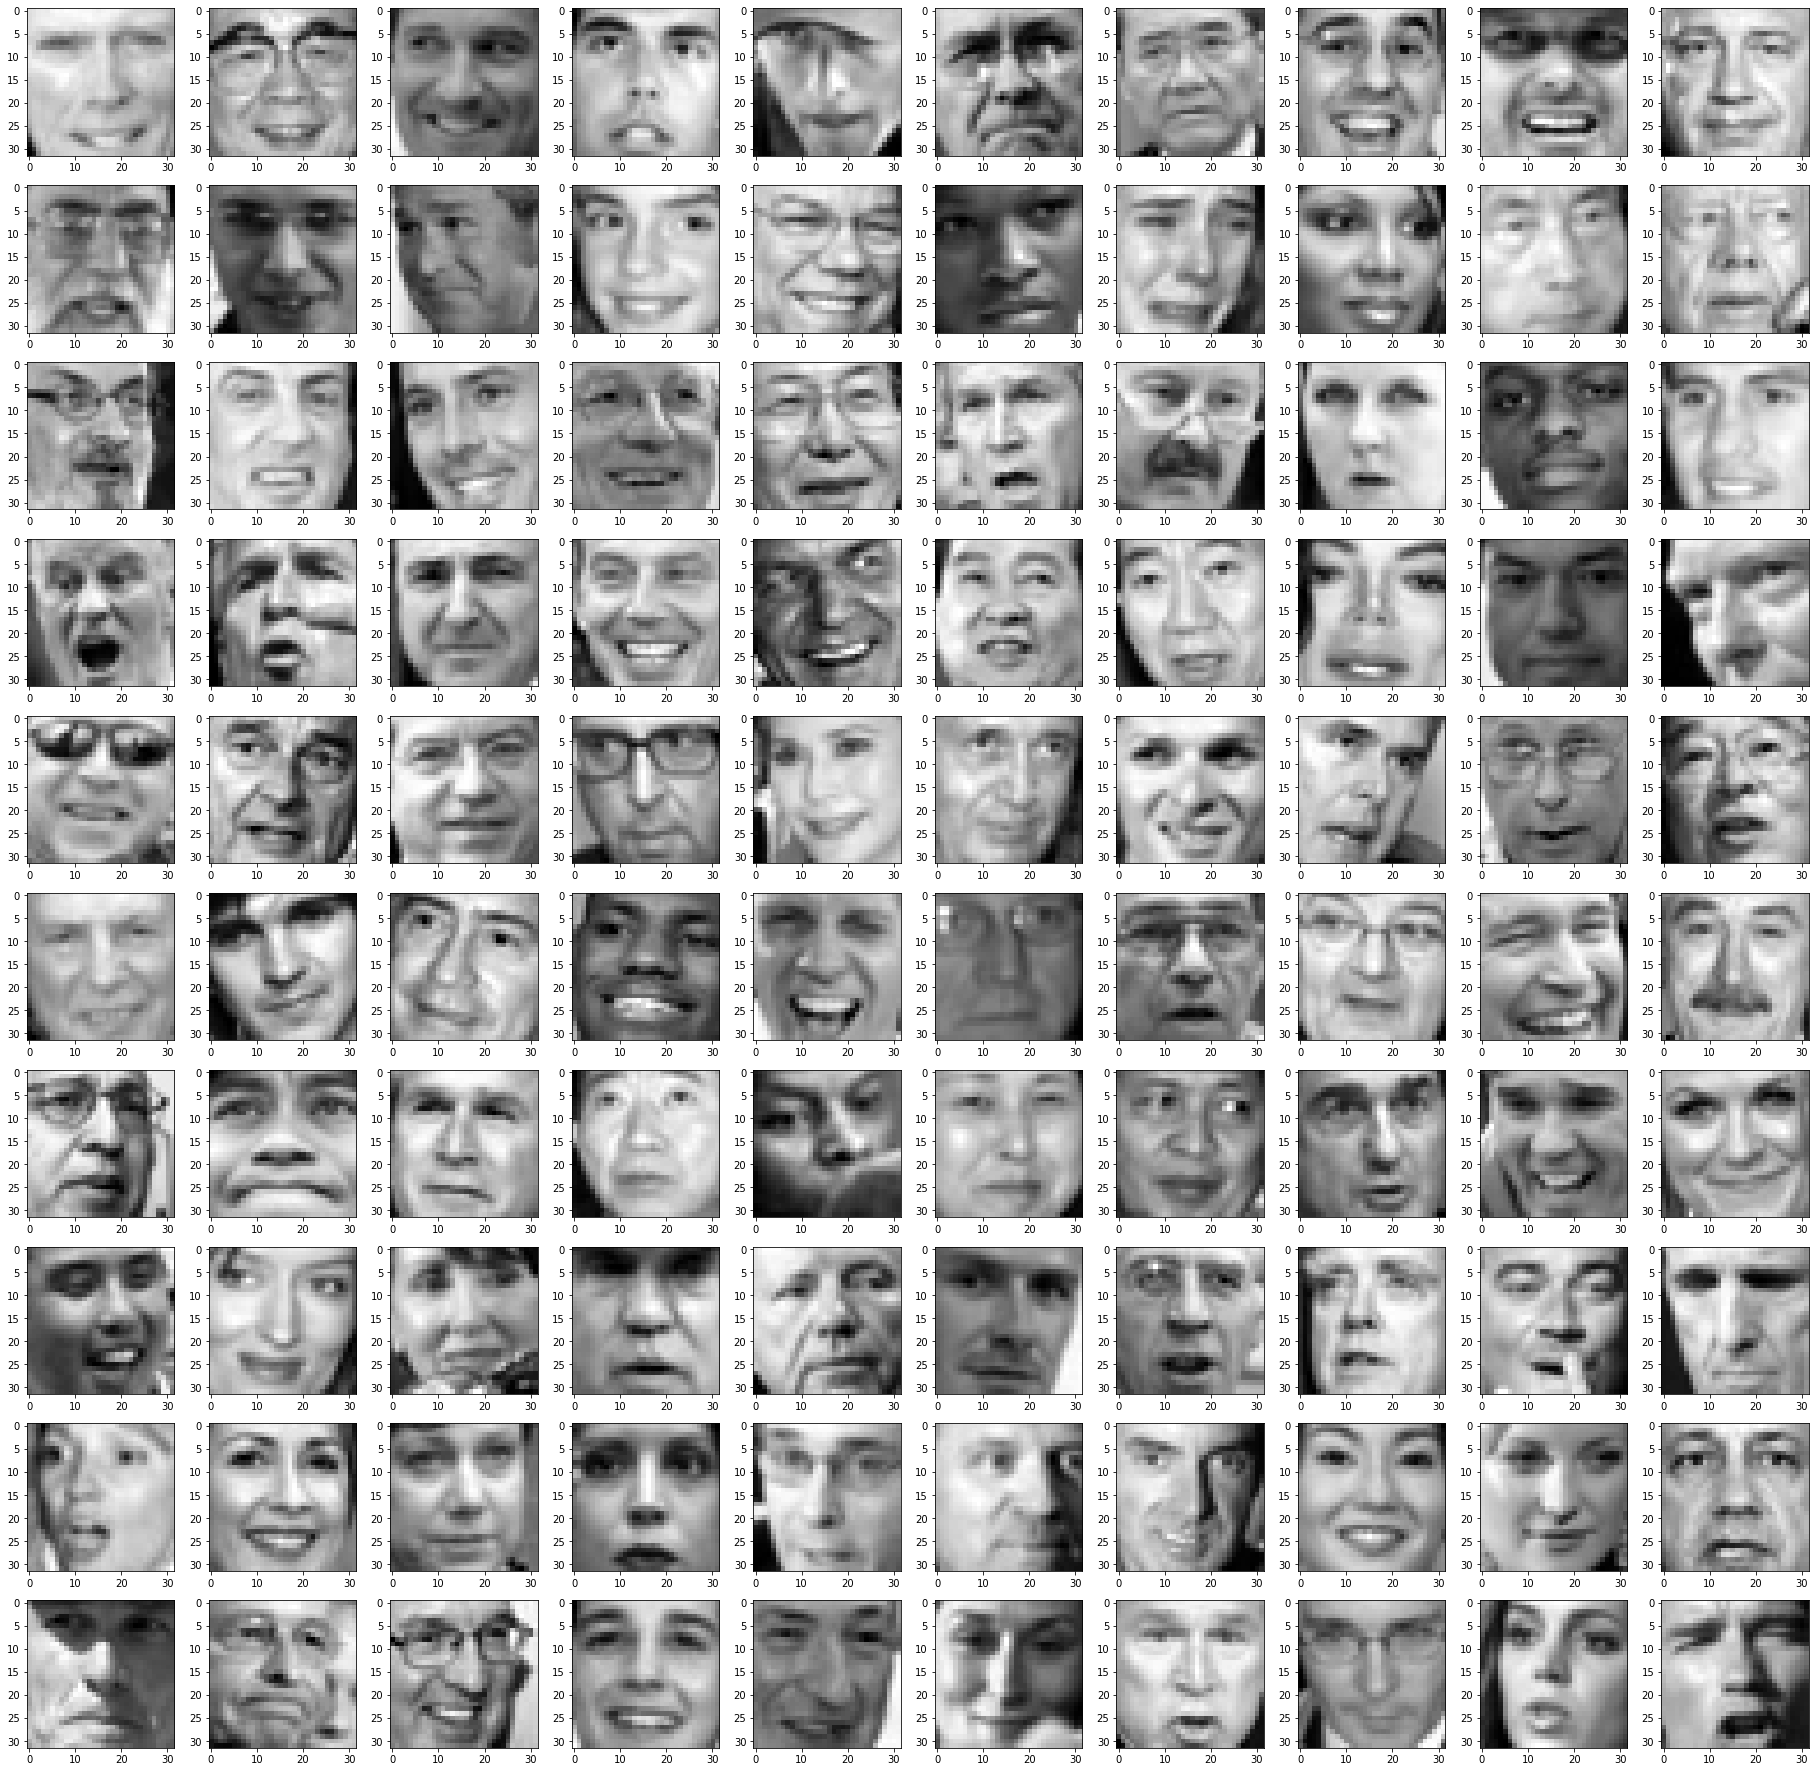

In [94]:
display_img_grid(X, img_dim)

### Run PCA on Faces

In [95]:
# normalize data
X_norm, mu, sigma = feature_normalize(X)

In [96]:
# get principal components
U, S = pca(X_norm)

### Reduce & Reconstruct Data
  - This will reduce the dimensionality from 1024 to 100

In [97]:
K = 100
Z = project_data(X_norm, U, K)

In [98]:
Z.shape

(5000, 100)

In [99]:
X_rec = recover_data(Z, U, K)

### Visualize Reconstructed Images

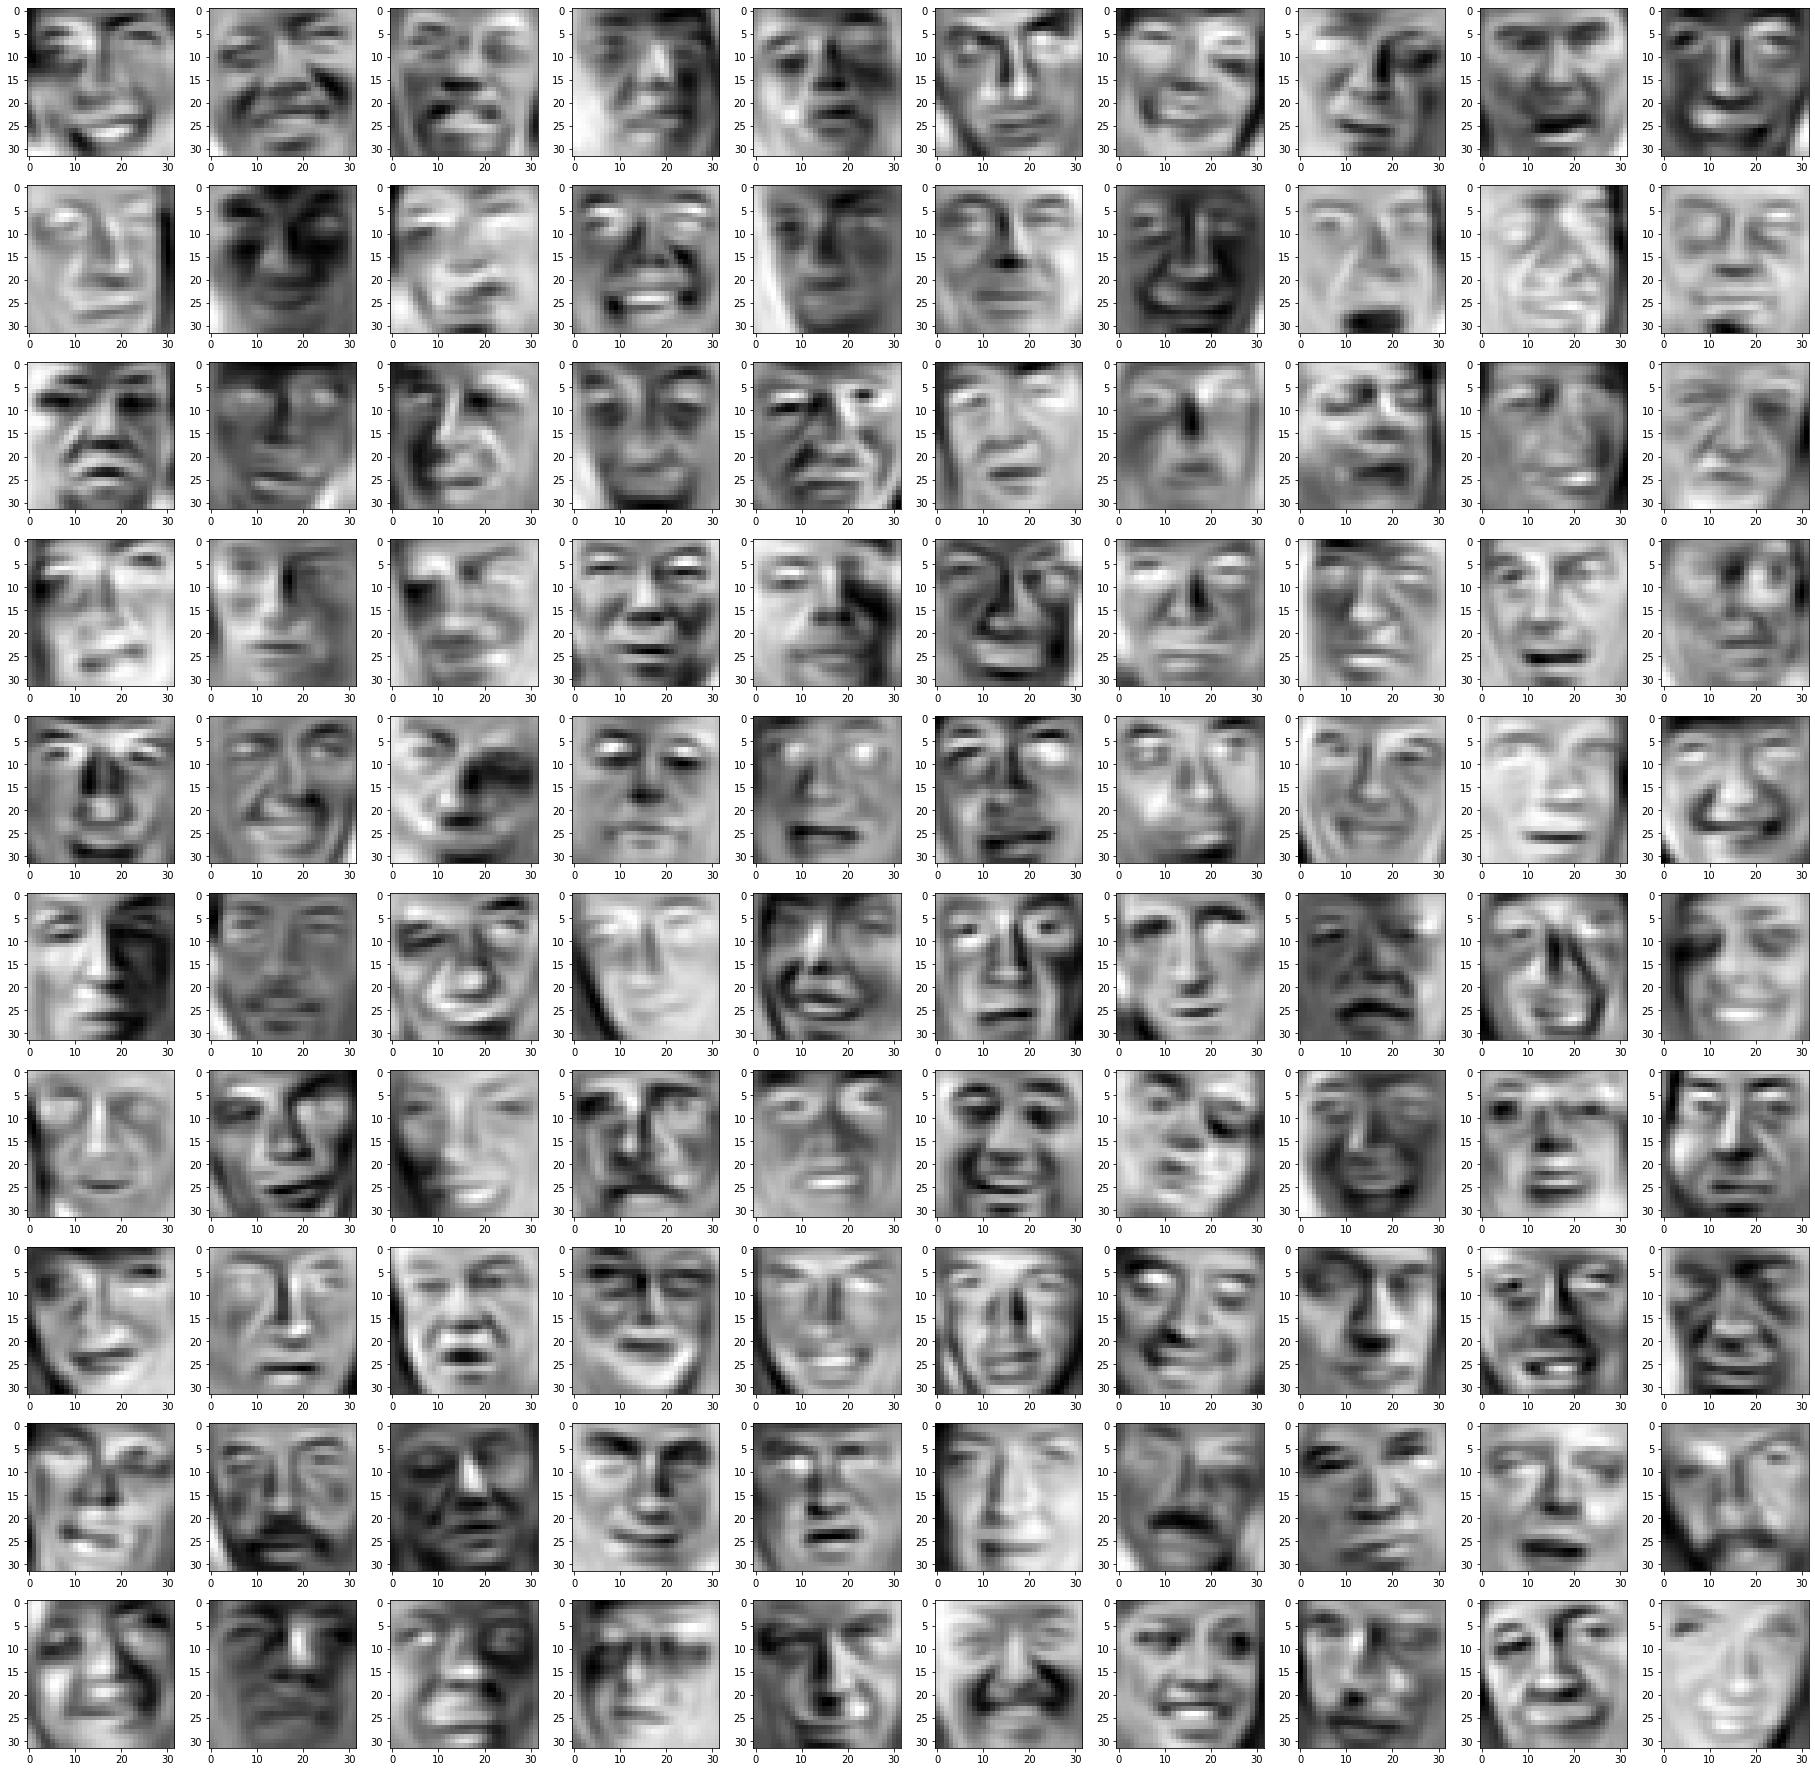

In [100]:
display_img_grid(X_rec, img_dim)